<a href="https://colab.research.google.com/github/GitMarco27/TMML/blob/main/001_First_Net.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3 Minutes Machine Learning
## Episode 1: First Net - Part I

#### Marco Sanguineti, 2021
---
Welcome to 3 minutes Machine Learning!

In [40]:
# Let's load some libraries
import matplotlib.pyplot as plt
from gtts import gTTS #Import Google Text to Speech
from IPython.display import Audio #Import Audio method from IPython's Display Class

In [41]:
!pip install gtts

In [42]:
tts = gTTS('Welcome to 3 Minutes Machine Learning. Colaboratory, or “Colab” for short, is a product from Google Research. Colab allows anybody to write and execute arbitrary python code through the browser, and is especially well suited to machine learning, data analysis and education. More technically, Colab is a hosted Jupyter notebook service that requires no setup to use, while providing free access to computing resources including GPUs. Find out more at the following link') #Provide the string to convert to speech
tts.save('1.wav') #save the string converted to speech as a .wav file
sound_file = '1.wav'
print('Welcome Audio')
Audio(sound_file, autoplay=True) 

Welcome Audio


In [45]:
def loadThumb(path):
  # Let's import this video thumbnail!
  myThumb = plt.imread(path)
  fig, ax = plt.subplots(figsize=(15, 10))
  plt.axis('off')
  ax.imshow(myThumb)
  plt.show()

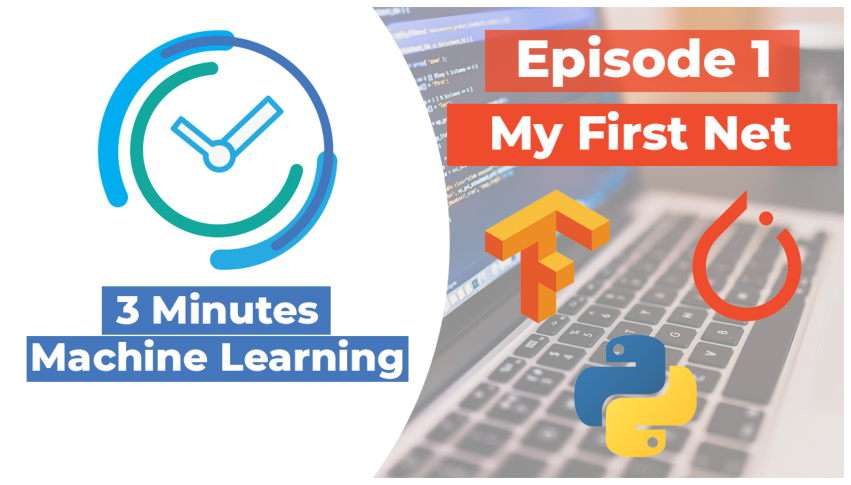

In [46]:
loadThumb('/tmp/yt_thumb_001.png')

#### Video Topics
> 1. Familiarize yourself with colab
> 2. Import a Simple Dataset
> 3. Create the simplest machine learning model with tensorflow
> 4. See you on next video! 

# Google colab: why
---

Colaboratory, or “Colab” for short, is a product from Google Research. Colab allows anybody to write and execute arbitrary python code through the browser, and is especially well suited to machine learning, data analysis and education. More technically, Colab is a hosted Jupyter notebook service that requires no setup to use, while providing free access to computing resources including GPUs. Find out more at this [link](https://research.google.com/colaboratory/faq.html).

Keywords
> 1. Python Code
> 2. Machine learning and data analysis
> 3. **Free for everyone**

# Import a simple Dataset
---

In this video we introduce our first data: it is a dataset concerning the evaluation of the price of houses as 13 variables vary. In this video we introduce a lot of concepts, which will be explained one by one in the next videos!

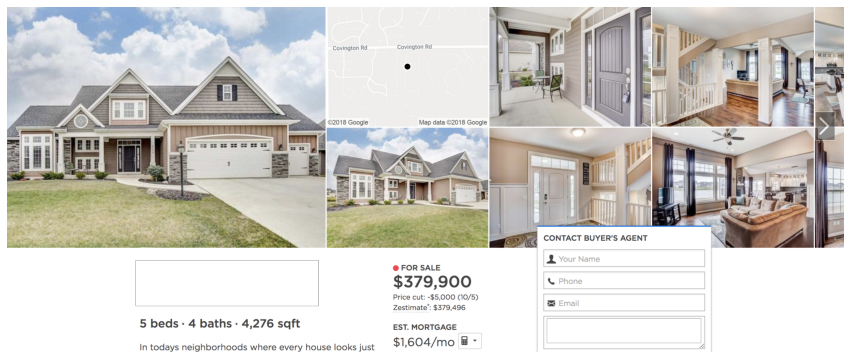

In [47]:
fig, ax = plt.subplots(figsize=(15, 15))
plt.imshow(plt.imread('houses.png'))
plt.axis('off')
plt.show()

In [48]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import pandas as pd

In [49]:
# Let's import out dataset!

In [50]:
(train_features, train_labels), (test_features, test_labels) = keras.datasets.boston_housing.load_data()

In [51]:
print(f'My dataset has {train_features.shape[0]}, {train_features.shape[1]} features and {test_labels.reshape(-1, 1).shape[1]} labels')

My dataset has 404, 13 features and 1 labels


In [52]:
pd.DataFrame(train_features).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


# My First model: Perceptron
---

Let's create the most basic machine learning model based on neural network: the perceptron

In [53]:
def normalize(x):
  """
  Normalize an array between 0 and 1

  Args:
    x (array): array to be normalized
  
  Returns:
    X (array): normalized array

  """
  X = (x - np.min(x)) / (np.max(x) - np.min(x))
  return X

In [54]:
# Let's isolate a single feature: we're working with 1 input and 1 output

In [55]:
x = train_features[:, 5]
y = train_labels

Check the relationship between our feature (input) and label (output)

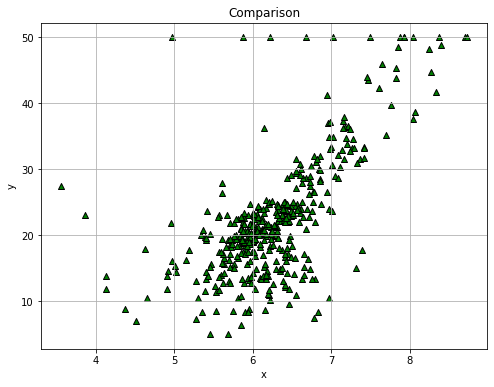

In [57]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x, y, c='g', edgecolors='k', marker='^')
plt.grid('both')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Comparison')
plt.show()

It's a good idea to normalize our data

In [58]:
x = normalize(x)
y = normalize(y)

Let's create our first Machine Learning Model

In [59]:
# Create the model
model = tf.keras.Sequential([tf.keras.layers.Dense(1, activation='linear')])
# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.001), loss='mse', metrics=['mae', 'mse'])
# Let's fit the model!
history = model.fit(x, y, batch_size=20, epochs=100)

Epoch 1/100
21/21 [==============================] - 1s 1ms/step - loss: 0.7333 - mae: 0.8044 - mse: 0.7333
Epoch 2/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6653 - mae: 0.7619 - mse: 0.6653
Epoch 3/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6039 - mae: 0.7208 - mse: 0.6039
Epoch 4/100
21/21 [==============================] - 0s 1ms/step - loss: 0.5496 - mae: 0.6835 - mse: 0.5496
Epoch 5/100
21/21 [==============================] - 0s 1ms/step - loss: 0.4996 - mae: 0.6466 - mse: 0.4996
Epoch 6/100
21/21 [==============================] - 0s 1ms/step - loss: 0.4555 - mae: 0.6121 - mse: 0.4555
Epoch 7/100
21/21 [==============================] - 0s 2ms/step - loss: 0.4159 - mae: 0.5798 - mse: 0.4159
Epoch 8/100
21/21 [==============================] - 0s 1ms/step - loss: 0.3797 - mae: 0.5488 - mse: 0.3797
Epoch 9/100
21/21 [==============================] - 0s 1ms/step - loss: 0.3474 - mae: 0.5199 - mse: 0.3474
Epoch 10/100
21/21 [========

Check the structure of our model

In [60]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Check the weights of a simple perceptron

In [61]:
model.get_weights()

[array([[-0.3983983]], dtype=float32), array([0.603293], dtype=float32)]

Loss function trend

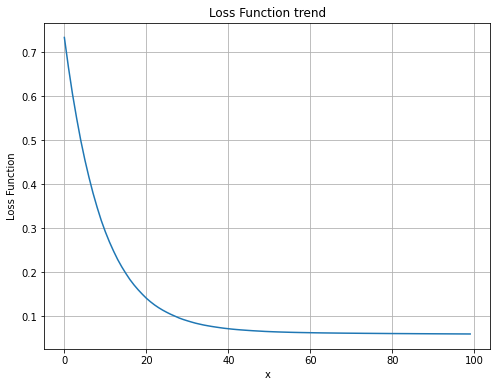

In [69]:
loss = history.history['loss']
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(loss)
plt.grid('both')
plt.xlabel('x')
plt.ylabel('Loss Function')
plt.title('Loss Function trend')
plt.show()

Check the quality of our model prediction

In [70]:
Y = model.predict(x)

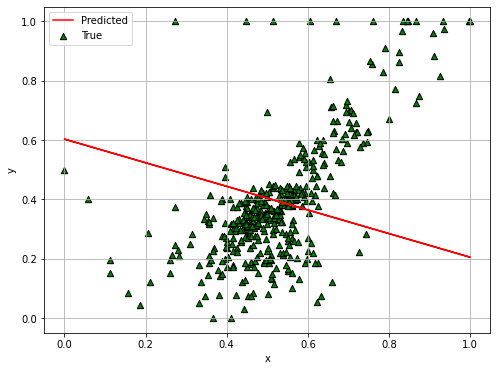

In [72]:
fig, ax = plt.subplots(figsize=(8, 6))
plt.scatter(x, y, c='g', s=40, marker='^', edgecolors='k', label='True')
plt.plot(x, Y, c='r', label='Predicted')
plt.grid('both')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### Greetings
---

In [65]:
!pip install art

     |████████████████████████████████| 573kB 3.0MB/s 


In [66]:
from art import tprint, aprint
tprint('See you on next videos!')

 ____                                                                        _            _      _                    _ 
/ ___|   ___   ___   _   _   ___   _   _    ___   _ __    _ __    ___ __  __| |_  __   __(_)  __| |  ___   ___   ___ | |
\___ \  / _ \ / _ \ | | | | / _ \ | | | |  / _ \ | '_ \  | '_ \  / _ \\ \/ /| __| \ \ / /| | / _` | / _ \ / _ \ / __|| |
 ___) ||  __/|  __/ | |_| || (_) || |_| | | (_) || | | | | | | ||  __/ >  < | |_   \ V / | || (_| ||  __/| (_) |\__ \|_|
|____/  \___| \___|  \__, | \___/  \__,_|  \___/ |_| |_| |_| |_| \___|/_/\_\ \__|   \_/  |_| \__,_| \___| \___/ |___/(_)
                     |___/                                                                                              



In [67]:
def subscribe():
  """
  Attractive subscription form
  """
  aprint("giveme", number=5)
  print(f'\n\tLike and subscribe to support this work!\n')
  aprint("giveme", number=5)

In [68]:
# Let's add some final click-bait content
subscribe()

༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ 

	Like and subscribe to support this work!

༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ ༼ つ ◕_◕ ༽つ 
